# **Predicting Vehicles With pytorch**

## **Import Libraries**

In [35]:

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import functional as f
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder

In [36]:
# Set the seed for reproducibly
torch.manual_seed(42)
np.random.seed(42)

BATCH_SIZE = 8
EPOCH = 5

## **Load The Data**

In [37]:
try:
    import google.colab
    if not os.path.exists("vehicles"):
        os.system('git clone "https://github.com/denis-spe/vehicles"')

    # Directory of dataset
    data_dir = "vehicles/vehicles"
except:
    # Directory of dataset
    data_dir = 'vehicles/vehicles'

In [38]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [39]:
# Create a ImageFolder object: dataset
dataset = ImageFolder(
    data_dir,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((300, 300))
    ])
    )
dataset

Dataset ImageFolder
    Number of datapoints: 196
    Root location: vehicles/vehicles
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [40]:
# classes
classes = dataset.classes
classes

['bus', 'car', 'motorbike', 'truck']

In [41]:
len(dataset) * 0.75

147.0

In [42]:
# Set the seed for reproducibly
generator = torch.Generator(device=device).manual_seed(42)

# Number of images
n_imgs = len(dataset)

# Train and validation sample size
train_size = int(n_imgs * 0.75)
val_size = n_imgs - train_size

# Split the data into train and validation data
train_dataset, val_dataset = random_split(dataset, lengths=[train_size, val_size], generator=generator)

print("Number of train samples: %s\nNumber of val samples: %s" % (len(train_dataset), len(val_dataset)))

Number of train samples: 147
Number of val samples: 49


In [43]:
# Construct a DataLoader objects
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
    )
val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    )

In [44]:

# Get one of the image from the train data
img, label = next(iter(train_dataloader.dataset))
img.shape

torch.Size([3, 300, 300])

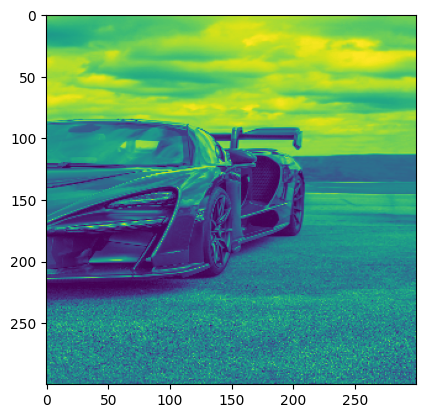

In [55]:

dir(img.squeeze)

plt.imshow(img.squeeze()[1])
plt.show()